In [2]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [4]:
from PIL import Image
from IPython.core.display import HTML

from engine.utils import ProgramGenerator, ProgramInterpreter
from prompts.imgedit import PROMPT

/home/enhao/miniconda3/envs/visprog/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
interpreter = ProgramInterpreter(dataset='imageEdit')

Registering FACEDET step


Downloading: "https://folk.ntnu.no/haakohu/WIDERFace_DSFD_RES152.pth" to /home/enhao/.cache/torch/hub/checkpoints/WIDERFace_DSFD_RES152.pth
100%|██████████| 459M/459M [02:39<00:00, 3.02MB/s]   
/home/enhao/miniconda3/envs/visprog/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/enhao/miniconda3/envs/visprog/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Registering SEG step


preprocessor_config.json: 100%|██████████| 380/380 [00:00<00:00, 1.28MB/s]
/home/enhao/miniconda3/envs/visprog/lib/python3.10/site-packages/transformers/models/maskformer/feature_extraction_maskformer.py:28: FutureWarning: The class MaskFormerFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use MaskFormerImageProcessor instead.
  warnings.warn(
/home/enhao/miniconda3/envs/visprog/lib/python3.10/site-packages/transformers/models/maskformer/image_processing_maskformer.py:403: FutureWarning: The `size_divisibility` argument is deprecated and will be removed in v4.27. Please use `size_divisor` instead.
  warnings.warn(
/home/enhao/miniconda3/envs/visprog/lib/python3.10/site-packages/transformers/models/maskformer/image_processing_maskformer.py:410: FutureWarning: The `max_size` argument is deprecated and will be removed in v4.27. Please use size['longest_edge'] instead.
  warnings.warn(
config.json: 100%|██████████| 10.8k/10.8k [00:00<00:00, 24.6MB/s]

Registering SELECT step


config.json: 100%|██████████| 4.52k/4.52k [00:00<00:00, 8.98MB/s]
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
pytorch_model.bin: 100%|██████████| 1.71G/1.71G [02:31<00:00, 11.3MB/s]
tokenizer_config.json: 100%|██████████| 905/905 [00:00<00:00, 2.25MB/s]
vocab.json: 100%|██████████| 961k/961k [00:00<00:00, 4.55MB/s]
merges.txt: 100%|██████████| 525k/525k [00:00<00:00, 12.1MB/s]
tokenizer.json: 100%|██████████| 2.22M/2.22M [00:00<00:00, 6.57MB/s]
special_tokens_map.json: 100%|██████████| 389/389 [00:00<00:00, 977kB/s]


Registering COLORPOP step
Registering BGBLUR step
Registering REPLACE step


scheduler/scheduler_config.json: 100%|██████████| 287/287 [00:00<00:00, 634kB/s]



text_encoder/config.json: 100%|██████████| 635/635 [00:00<00:00, 1.92MB/s]


tokenizer/special_tokens_map.json: 100%|██████████| 472/472 [00:00<00:00, 1.29MB/s]


safety_checker/config.json: 100%|██████████| 4.75k/4.75k [00:00<00:00, 4.89MB/s]





tokenizer/tokenizer_config.json: 100%|██████████| 821/821 [00:00<00:00, 2.26MB/s]



unet/config.json: 100%|██████████| 810/810 [00:00<00:00, 3.16MB/s]



vae/config.json: 100%|██████████| 613/613 [00:00<00:00, 1.48MB/s]














tokenizer/merges.txt: 100%|██████████| 525k/525k [00:00<00:00, 1.48MB/s]





tokenizer/vocab.json: 100%|██████████| 1.06M/1.06M [00:00<00:00, 1.36MB/s]

























































































































diffusion_pytorch_model.bin: 100%|██████████| 167M/167M [00:50<00:00, 3.31MB/s]













































pytorch_model.bin: 100%|█████████

Registering EMOJI step
Registering RESULT step


In [6]:
def create_prompt(instruction):
    return PROMPT.format(instruction=instruction)

generator = ProgramGenerator(prompter=create_prompt)

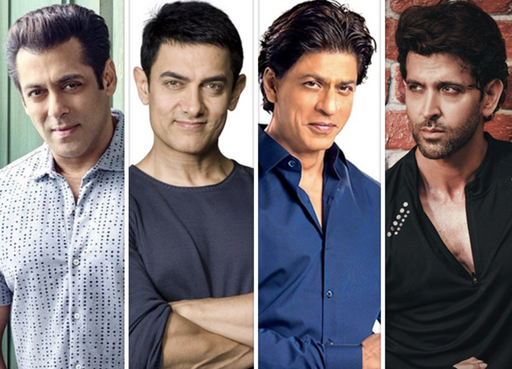

In [7]:
image = Image.open('../assets/bollywood.png')#.resize((512,512))
image.thumbnail((512,512),Image.Resampling.LANCZOS)
init_state = dict(
    IMAGE=image.convert('RGB')
)
image

In [8]:
instruction = "Replace man in black henley (person) with brick wall"
# instruction = "Hide Salman and Aamir's faces with :ps, Shahrukh's faces with 8) and Hritik's with ;)"
# instruction = "Create a colorpop of the man in black henley and also blur the background"
prog,_ = generator.generate(instruction)
print(prog)

OBJ0=SEG(image=IMAGE)
OBJ1=SELECT(image=IMAGE,object=OBJ0,query='man in black henley',category='person')
IMAGE0=REPLACE(image=IMAGE,object=OBJ1,prompt='brick wall')
FINAL_RESULT=RESULT(var=IMAGE0)


In [9]:
result, prog_state, html_str = interpreter.execute(prog,init_state,inspect=True)

SEG


`label_ids_to_fuse` unset. No instance will be fused.


dict_keys(['segmentation', 'segments_info'])
SELECT
REPLACE


100%|██████████| 50/50 [01:49<00:00,  2.19s/it]


RESULT


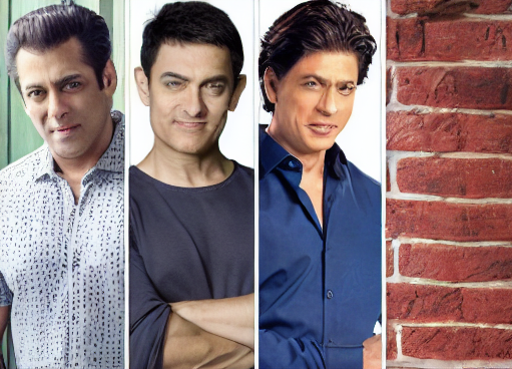

In [10]:
result


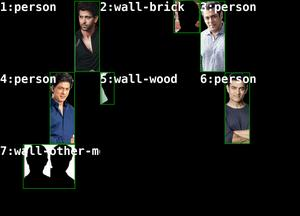
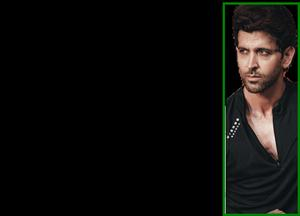
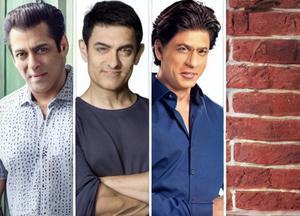
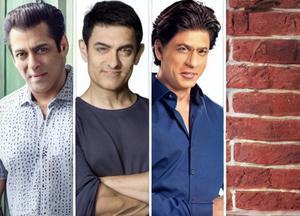

In [11]:
HTML(html_str)